Answers question 5 of the test exam

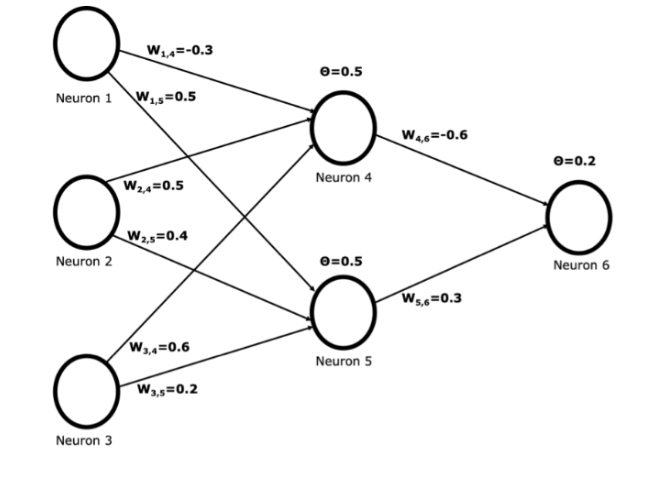

In [1]:
import torch
import torch.nn as nn

In [2]:
class binary_activation(nn.Module):
    def __init__(self):
        super(binary_activation, self).__init__()

    def forward(self, x):
        x[x >= 0] = 1
        x[x < 0] = 0
        return x

In [3]:
model = nn.Sequential(nn.Linear(3,2),
                      binary_activation(),
                      nn.Linear(2,1),
                      binary_activation()
                      )

In [4]:
with torch.no_grad():
    model[0].weight[0, 0] = -0.3
    model[0].weight[1, 0] = 0.5
    model[0].weight[0, 1] = 0.5
    model[0].weight[1, 1] = 0.4
    model[0].weight[0, 2] = 0.6
    model[0].weight[1, 2] = 0.2
    model[0].bias.fill_(-0.5)

    model[2].weight[0, 0] = -0.6
    model[2].weight[0, 1] = 0.5
    model[2].bias[0] = -0.2


In [5]:
print(f"i. output 3rd layer with input [0, 1, 1]:  {model(torch.Tensor([0, 1, 1])).tolist()}")
print(f"ii. output 3rd layer with input [1, 0, 1]:  {model(torch.Tensor([1, 0, 1])).tolist()}")

i. output 3rd layer with input [0, 1, 1]:  [0.0]
ii. output 3rd layer with input [1, 0, 1]:  [1.0]


In [6]:
model = model[:-2]

In [7]:
print(f"i. output 2nd layer with input [0, 1, 1]:  {model(torch.Tensor([0, 1, 1])).tolist()}")
print(f"ii. output 2nd layer with input [1, 0, 1]:  {model(torch.Tensor([1, 0, 1])).tolist()}")

i. output 2nd layer with input [0, 1, 1]:  [1.0, 1.0]
ii. output 2nd layer with input [1, 0, 1]:  [0.0, 1.0]


So the answers are:

i. Neuron 4=1, 5=1, 6=0

ii. Neuron 4=0, 5=1, 6=1